<a href="https://colab.research.google.com/github/kyalo-vundi/kyalo.picasso/blob/main/DATA_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LOAD THE DATASET

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/50_Startups.csv")

In [6]:


def full_summary(df):
    # numeric summary
    num_summary = df.describe(include=[np.number]).T

    # categorical/bool summary
    cat_summary = df.describe(include=['object', 'bool']).T

    # merge them together
    summary = pd.concat([num_summary, cat_summary], axis=0, sort=False)

    return summary

# Example:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/50_Startups.csv")
summary_table = full_summary(df)
summary_table


,count,mean,std,min,25%,50%,75%,max,unique,top,freq
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20,NaN,NaN,NaN
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56,NaN,NaN,NaN
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10,NaN,NaN,NaN
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83,NaN,NaN,NaN
State,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,New York,17


EXPLORE THE DATA

In [7]:
df_info = df.info()
df_decription = df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


HANDLING CATEGORICAL DATA

In [4]:
#STATE is in categorical value so we convert it using one hot encoding
df = pd.get_dummies(df, columns=['State'], drop_first=True)




simple linear regression

In [10]:
#selecting features and target variable
X = df[['R&D Spend']]
y = df['Profit']
#split the data to training (80%)and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.2,random_state=42)
#train the model
model = LinearRegression()
model.fit(X_train, y_train)
#make prediction
y_predict = model.predict(X_temp)

EVALUATE THE MODEL

In [13]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make prediction
y_predict = model.predict(X_temp)

mae= mean_absolute_error(y_temp,y_predict)
mse=mean_squared_error(y_temp,y_predict)
r2 = r2_score(y_temp,y_predict)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 6077.36
MSE: 59510962.81
RMSE: 7714.33
R2 Score: 0.93


visualize the regression

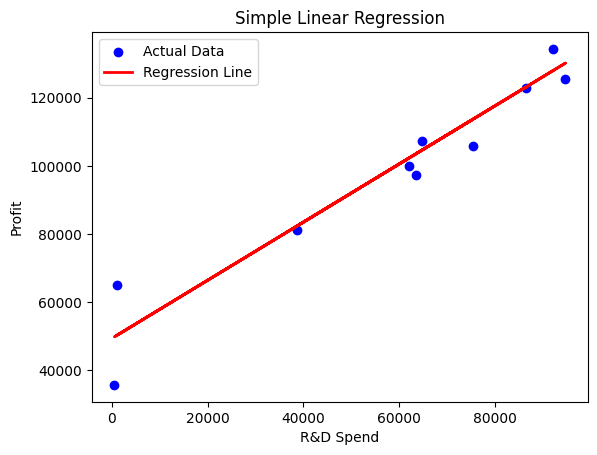

In [15]:
plt.scatter(X_temp, y_temp, color='blue', label='Actual Data')
plt.plot(X_temp, y_predict, color='red', linewidth=2, label='Regression Line')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

MULTIPLE LINEAR REGRESSION

In [21]:
X_multi = df[['R&D Spend', 'Administration', 'Marketing Spend','State_New York', 'State_Florida']]
y_multi = df['Profit']
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initializing a Linear Regression model
model_multi = LinearRegression()

# Training the model using the training dataset
model_multi.fit(X_train_m, y_train_m)

# Making predictions on the test dataset
y_pred_multi = model_multi.predict(X_test_m)

# Calculating evaluation metrics
mae_multi = mean_absolute_error(y_test_m, y_pred_multi)  # Mean Absolute Error
mse_multi = mean_squared_error(y_test_m, y_pred_multi)  # Mean Squared Error
rmse_multi = np.sqrt(mse_multi)  # Root Mean Squared Error
r2_multi = r2_score(y_test_m, y_pred_multi)  # R-squared score (coefficient of determination)

print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R2 Score: {r2_multi:.2f}")

MAE: 6961.48
MSE: 82010363.04
RMSE: 9055.96
R2 Score: 0.90


In [20]:
# Reload the dataset to ensure correct state
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/50_Startups.csv")

# Re-apply one-hot encoding
df = pd.get_dummies(df, columns=['State'], drop_first=True)

print(df.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')


TRANSFORM DATA FOR LINEAR REGRESSION

In [22]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(df[['R&D Spend']])

TRAIN AND EVALUATE THE MODEL

In [23]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

VISUALIZE CURVE

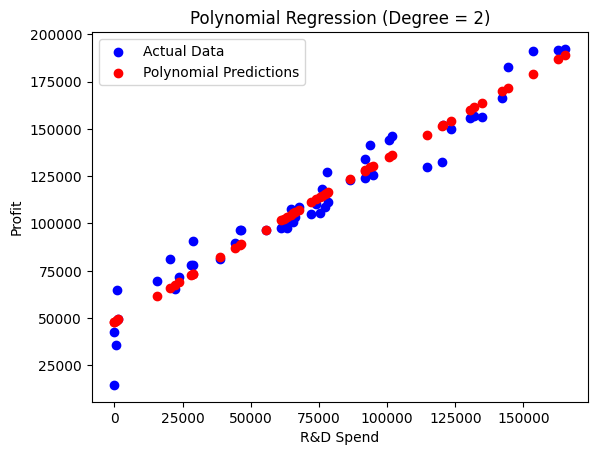

In [24]:
plt.scatter(df['R&D Spend'], y, color='blue', label='Actual Data')
plt.scatter(df['R&D Spend'], y_pred_poly, color='red', label='Polynomial Predictions')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Polynomial Regression (Degree = 2)")
plt.legend()
plt.show()